<a href="https://colab.research.google.com/github/cheul0518/DeepLearning/blob/main/NN_DL/Chapter5_MN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise

1. In out discussion of the vanishing gradient problem, we made use of the fact that $|\sigma'(z)|<\frac{1}{4}$. Suppose we used a different activation function, one whose derivative could be much larger. Would that help us avoid the unstable gradient problem? 
  - No, a different activation function such as Relu has a higher chance of having exploding gradient problem, one of the unstable gradient problem. However, the different activation functions whose derivative are much larger would help us avoid vanishing gradient problem.

# Problems

1. Consider the product $|w\sigma'(wa+b)|$. Suppose $|w\sigma'(wa+b)|\geq 1$. (1) Argue that this can only ever occur if $|w|\geq 4$. (2) Supposing that  $|w|\geq 4$, consider the set of input activations $a$ for which $|w\sigma'(wa+b)|\geq 1$. Show that the set of $a$ satisfying that contraint can range over an interval no greater in width than $\frac{2}{|w|}ln\frac{|w|(1+\sqrt{1-4/|w|})}{2}-1$. (3) Show numerically that the above expression bounding the width of the range is greatest at $|w|\approx6.9$, where it takes a value $\approx0.45$. And so even given that everything lines up just perfectly, we still have a fairly narrow range of input activations which can avoid the vanishing gradient problem.

  (1) For $\forall z$, $0\leq\sigma'(z)\leq\frac{1}{4}$. $|w\sigma'(wa+b)|\geq 1 \leftrightarrow |w||\sigma'(wa+b)|\geq1$, where $w$ is a real-number scalar. Thus, $|w|\geq\frac{1}{|\sigma'(wa+b)|} = 4$

  (2) $|w\sigma'(wa+b)|\geq 1 \leftrightarrow |w|\sigma'(wa+b)\geq 1$, because $0\leq\sigma'(x)\leq\frac{1}{4}$ for $\forall x$.

  $|w|\sigma'(wa+b)=|w|\frac{e^{-wa-b}}{(1+e^{-wa-b})^2} \leq 1$
  $\to |w|(e^{-wa-b}) \leq (1+e^{-wa-b})^2$ 
  $\to (e^{-wa-b})^2+(2-|w|)e^{-wa-b}+1 \geq 0$. Substitue $e^{-wa-b}$ for $x$.
  Then, $x^2+(2-|w|)x+1 \geq 0$. Using roots of quadratic function: $x = \frac{-b\pm\sqrt{b^2-4ac}}{2a}$, $(x - (\frac{|w|}{2}(1+\sqrt{1-\frac{4}{|w|}})-1))(x - (\frac{|w|}{2}(1-\sqrt{1-\frac{4}{|w|}})-1)) \geq 0$. 
  
  So, $x \geq (\frac{|w|}{2}(1+\sqrt{1-\frac{4}{|w|}})-1)$, because $x \geq 0$ and $(\frac{|w|}{2}(1+\sqrt{1-\frac{4}{|w|}})-1) \geq (\frac{|w|}{2}(1-\sqrt{1-\frac{4}{|w|}})-1) \geq 0$. 
  
  Now substitute back $x$ for $e^{-wa-b}$, $e^{-wa-b} \geq (\frac{|w|}{2}(1+\sqrt{1-\frac{4}{|w|}})-1)$. Take the log of both sides, then $-wa-b \geq ln(\frac{|w|}{2}(1+\sqrt{1-\frac{4}{|w|}})-1) \to wa \leq ln(\frac{|w|}{2}(1+\sqrt{1-\frac{4}{|w|}})-1) - b$. Considering both cases: $w \geq 4$ or $w \leq 4$, $-\frac{1}{w}ln(\frac{|w|}{2}(1+\sqrt{1-\frac{4}{|w|}})-1) - b \leq a \leq \frac{1}{w}ln(\frac{|w|}{2}(1+\sqrt{1-\frac{4}{|w|}})-1) - b$.

  Thus, $a$ is within $\frac{2}{|w|}ln(\frac{|w|}{2}(1+\sqrt{1-\frac{4}{|w|}})-1)$.


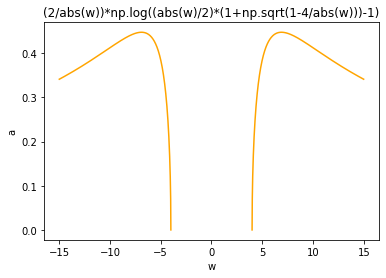

Maximum value of a is 0.45 at both 6.9 and -6.9


In [ ]:
#@title (3) The maximum value of a and w's location
import matplotlib.pyplot as plt
import numpy as np

def a(w):
    return (2/abs(w))*np.log((abs(w)/2)*(1+np.sqrt(1-4/abs(w)))-1)

w_pos = np.arange(4, 15, 0.01)
w_neg = np.arange(-4, -15, -0.01)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('(3)Graph between a and w')
ax.set_xlabel('w')
ax.set_ylabel('a')
plt.plot(w_pos,a(w_pos),color='orange')
plt.plot(w_neg,a(w_neg),color='orange')
plt.show()

max_pos = a(w_pos).tolist().index(max(a(w_pos)))
max_neg = a(w_neg).tolist().index(max(a(w_neg)))
print(f'Maximum value of a is {max(a(w_pos)):.2f} at both {w_pos[max_pos]:.1f} and {w_neg[max_neg]:.1f}')

2. **Identity neuron**: Consider a neuron with a single input, $x$, a corresponding weight $w_1$, a bias $b$. and a weight $w_2$ on the output. Show that by choosing the weights and bias appropriately, we can ensure $w_2\sigma(w_1x+b)\approx x$ for $x\in[0,1]$. Such a neuron can thus be used as a kind of identity neuron, that is, a neuron whose output is the same (up to rescaling by a weight factor) as its input. Hint: it helps to rewrite $x=\frac{1}{2}+\Delta$, to assume $w_1$ is small, and to use a Taylor series expansion in $w_1\Delta$.
  - The equation $w_2\sigma(w_1x+b)= x$ can be rewritten as $\sigma(w_1(x+\frac{b}{w_1}))= \frac{x}{w_2}$. The graph of $\sigma(w_1(x+\frac{b}{w_1})$ is a sigmoid function scaled by $w_1$ and shifted by $-\frac{b}{w_1}$. And $\frac{x}{w_2}$ is a linear function through the origin. So, if $\frac{1}{w_2} \geq 1 \leftrightarrow  w_2 \leq 1$, there would be always an intersection of these two graphs for $x\in[0,1]$, regardless of $w_1$ and $b$.

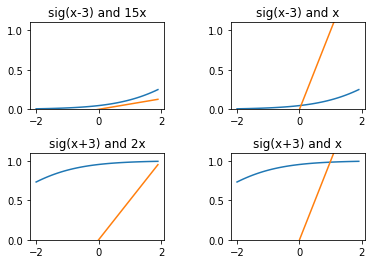

In [135]:
#@title Graphs of sigma(w1x+b) and x/w2 in order to find intersection points
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x,w1,s): # s = b/w1
    return 1/(1+np.exp(-w1*(x+s)))

def f(x,w2):
    return (1/w2)*x

x = np.arange(-2,2,0.1)
fig = plt.figure()
# First graph
ax = fig.add_subplot(221)
ax.set_title("sig(x-3) and 15x")
ax.set_ylim(0,1.1)
plt.plot(x, sigmoid(x,1.0,-3))
plt.plot(x, f(x,15))
# Second graph
ax = fig.add_subplot(222)
ax.set_title("sig(x-3) and x")
ax.set_ylim(0,1.1)
plt.plot(x, sigmoid(x,1.0,-3))
plt.plot(x, f(x,1.0))
# Third graph
ax = fig.add_subplot(223)
ax.set_title("sig(x+3) and 2x")
ax.set_ylim(0,1.1)
plt.plot(x, sigmoid(x,1.0,3))
plt.plot(x, f(x,2))
# Fourth graph
ax = fig.add_subplot(224)
ax.set_title("sig(x+3) and x")
ax.set_ylim(0,1.1)
plt.plot(x, sigmoid(x,1.0,3))
plt.plot(x, f(x,1))
plt.subplots_adjust(wspace=0.5,hspace=0.5) # Adjust space among the four graphs
plt.show()